In [1]:
!conda env list

# conda environments:
#
download                 /home/ai4026/.conda/envs/download
pythoon                  /home/ai4026/.conda/envs/pythoon
base                     /lustrefs/disk/modules/easybuild/software/Mamba/23.11.0-0
netcdf-py39              /lustrefs/disk/modules/easybuild/software/Mamba/23.11.0-0/envs/netcdf-py39
pytorch-2.2.2            /lustrefs/disk/modules/easybuild/software/Mamba/23.11.0-0/envs/pytorch-2.2.2
tensorflow-2.12.1        /lustrefs/disk/modules/easybuild/software/Mamba/23.11.0-0/envs/tensorflow-2.12.1
                         /lustrefs/disk/project/lt900053-ai2415/hack6/env/transformers
                         /lustrefs/disk/project/lt900053-ai2415/hack6/env/yolo
                      *  /lustrefs/disk/project/lt900053-ai2415/hack6/env/yolov5



In [2]:
from ultralytics import YOLO

In [3]:
model = YOLO("/project/lt900053-ai2415/hack6/yolo-models/yolov9/yolov9e_3.pt")

model.info()

YOLOv9e summary: 1225 layers, 58206592 parameters, 0 gradients, 193.0 GFLOPs


(1225, 58206592, 0, 193.01565439999996)

In [4]:
!nvidia-smi

Thu May 30 13:22:32 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  On   | 00000000:03:00.0 Off |                    0 |
| N/A   37C    P0    53W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA A100-SXM...  On   | 00000000:41:00.0 Off |                    0 |
| N/A   

In [5]:
results = model.train(data="/project/lt900053-ai2415/hack6/datasets/split_train_val/data.yaml", epochs=100, batch=32, imgsz=1024, patience=15, device=[0,1,2,3])

Ultralytics YOLOv8.2.22 🚀 Python-3.12.3 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40338MiB)
                                                           CUDA:1 (NVIDIA A100-SXM4-40GB, 40338MiB)
                                                           CUDA:2 (NVIDIA A100-SXM4-40GB, 40338MiB)
                                                           CUDA:3 (NVIDIA A100-SXM4-40GB, 40338MiB)
engine/trainer: task=detect, mode=train, model=/project/lt900053-ai2415/hack6/yolo-models/yolov9/yolov9e_3.pt, data=/project/lt900053-ai2415/hack6/datasets/split_train_val/data.yaml, epochs=100, time=None, patience=15, batch=32, imgsz=1024, save=True, save_period=-1, cache=False, device=[0, 1, 2, 3], workers=8, project=None, name=train22, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask

*****************************************
Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed. 
*****************************************


Ultralytics YOLOv8.2.22 🚀 Python-3.12.3 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40338MiB)
                                                           CUDA:1 (NVIDIA A100-SXM4-40GB, 40338MiB)
                                                           CUDA:2 (NVIDIA A100-SXM4-40GB, 40338MiB)
                                                           CUDA:3 (NVIDIA A100-SXM4-40GB, 40338MiB)
Overriding model.yaml nc=80 with nc=7
Transferred 1805/1811 items from pretrained weights
Freezing layer 'model.42.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks skipped ⚠️, offline and unable to download YOLOv8n. Setting 'amp=True'. If you experience zero-mAP or NaN losses you can disable AMP with amp=False.


train: Scanning /lustrefs/disk/project/lt900053-ai2415/hack6/datasets/split_tra


train: New cache created: /lustrefs/disk/project/lt900053-ai2415/hack6/datasets/split_train_val/spl_tv/labels.cache


val: Scanning /lustrefs/disk/project/lt900053-ai2415/hack6/datasets/split_train


val: New cache created: /lustrefs/disk/project/lt900053-ai2415/hack6/datasets/split_train_val/spl_tv/labels.cache
Plotting labels to runs/detect/train22/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 298 weight(decay=0.0), 310 weight(decay=0.0005), 309 bias(decay=0.0)
Image sizes 1024 train, 1024 val
Using 32 dataloader workers
Logging results to runs/detect/train22
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100        27G      2.049       7.19      2.023          2       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.304      0.177      0.151     0.0621

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      27.2G      1.966      2.981      1.874          4       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.477      0.149      0.134     0.0501

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      26.8G      2.105      3.198      2.013          5       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.209     0.0433     0.0257    0.00777

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      25.2G      2.232      3.495      2.134         12       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.214      0.132     0.0697     0.0267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      26.8G      2.099      3.163      2.026         11       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.394      0.149      0.123     0.0552

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      27.4G      2.018      2.829       1.95          3       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.385      0.225      0.209     0.0856

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      26.8G      2.006      2.743       1.96          7       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.343      0.256      0.239      0.109

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      26.8G      1.961      2.533      1.912          7       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.379      0.314      0.277      0.124

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      26.8G      1.913      2.425      1.892          5       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.502      0.359      0.359      0.164

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      26.8G      1.847      2.303      1.856          6       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.597       0.31      0.343      0.156

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      26.8G      1.846       2.21      1.844          6       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.478      0.397        0.4      0.189

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      27.5G      1.828      2.151      1.824          8       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.604      0.404      0.461      0.217

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      26.8G      1.815      2.052      1.812          1       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.439       0.35      0.354      0.165

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      25.2G      1.766      2.037      1.788          7       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.557      0.446      0.492      0.226

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      26.8G      1.764      1.961      1.803          0       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.687      0.454      0.517      0.251

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      26.8G      1.757      1.951      1.788          5       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.641      0.477      0.536       0.26

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      26.8G      1.746      1.869      1.772         17       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.652      0.463      0.549      0.271


  0%|          | 0/484 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      27.5G      1.712      1.774      1.731          6       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.591      0.523      0.562      0.277

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      26.8G      1.691      1.754      1.725          6       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343       0.65      0.498      0.566      0.277

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      26.8G      1.667      1.711      1.696          5       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.611      0.544      0.588      0.288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      27.4G      1.667      1.614      1.704          5       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343       0.62      0.539      0.582      0.291

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      26.8G      1.662      1.615      1.703          6       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.624       0.58      0.609      0.302

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      26.8G      1.623      1.577       1.67         12       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.617      0.586      0.613       0.31

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      25.1G      1.608      1.519      1.671          5       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.623      0.545      0.604      0.303

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      27.4G      1.624      1.494      1.687         10       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.663      0.573      0.634       0.32

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      26.8G      1.625      1.453      1.666          5       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.706      0.539       0.62      0.312

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      25.2G      1.602      1.432      1.639          0       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.679      0.557      0.628      0.322

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      26.8G      1.553      1.388      1.633          4       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.678      0.568      0.629      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      26.8G      1.564      1.343      1.608          5       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.661      0.599       0.64       0.33

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      26.8G      1.578      1.389      1.631          5       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.694      0.603      0.651      0.338

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      26.8G      1.548      1.295      1.608          4       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.703      0.624      0.663      0.344

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      26.7G      1.522      1.274      1.616          3       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.701      0.633      0.674      0.352

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      26.8G       1.51      1.249      1.592          6       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.692      0.631      0.676      0.349

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      27.5G      1.499      1.235      1.598          8       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.721      0.634      0.682      0.355

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      27.5G       1.48      1.232      1.564          6       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.695      0.644      0.682      0.358

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      27.4G      1.482      1.212      1.571          1       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343       0.69      0.644      0.684      0.362

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      27.5G       1.43      1.133      1.535          4       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.708      0.625      0.677      0.357

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      27.4G       1.42      1.163       1.53          6       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.735      0.661      0.695      0.367

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      26.8G      1.427      1.109      1.532          3       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.749      0.644      0.699      0.366

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      26.8G      1.416      1.087      1.506          3       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.724      0.647      0.693      0.366

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      26.8G      1.383      1.028      1.496          2       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.712      0.654      0.694      0.369

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      26.8G      1.382      1.054      1.508          2       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.733      0.633      0.686      0.364

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      26.8G      1.372      1.056      1.496          4       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.704      0.646      0.688      0.367

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      26.8G      1.356       1.04      1.496          2       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.692      0.667      0.694      0.373

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      26.8G      1.312      1.011      1.476          7       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.731      0.657      0.699      0.375

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      26.8G      1.308     0.9681      1.444          3       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.742      0.648      0.702      0.378

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      26.8G      1.308     0.9651      1.449          1       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.728      0.679      0.699      0.379

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      27.4G      1.312     0.9464      1.455          1       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.738      0.663      0.699      0.377

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      26.8G      1.289     0.9229      1.419          3       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.764       0.64      0.698      0.378

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      26.8G       1.24     0.8833      1.393          5       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.766       0.65        0.7      0.378

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      26.8G      1.262     0.8865      1.407          3       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.745      0.666      0.704      0.381

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      25.1G      1.245     0.8614      1.417          6       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.728      0.654      0.696      0.377

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      26.8G      1.216     0.8581      1.381          6       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.733      0.642      0.695      0.376

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      26.8G      1.204     0.8113      1.383          2       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.766      0.626      0.695      0.377

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      25.2G      1.206     0.8231      1.368          5       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343       0.75      0.641      0.693      0.377

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      26.8G      1.182     0.8123      1.359          4       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.745      0.648      0.692      0.376

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      25.1G      1.173     0.8107      1.367          5       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.771      0.641      0.695      0.379

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      27.5G      1.143     0.7809      1.329          9       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.755      0.648      0.696       0.38

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      27.4G      1.136     0.7684      1.331          8       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.755      0.642      0.698      0.382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      26.8G      1.112     0.7647      1.315          9       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.744       0.65      0.698      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      26.8G      1.094     0.7075      1.302          0       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343       0.74      0.655      0.698      0.385

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      25.1G      1.083     0.6983      1.294          3       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.727       0.66      0.696      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      26.8G      1.108     0.7172      1.304          3       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.727      0.661      0.696      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      26.8G      1.043     0.6644      1.266          8       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.739      0.654      0.698      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      26.8G      1.026      0.667      1.244          6       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.735      0.659      0.698      0.384

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      27.4G      1.032     0.6711      1.248          7       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.737      0.657      0.699      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      26.8G      1.018     0.6485      1.237          7       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.734      0.656      0.698      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      26.8G      1.009     0.6451      1.231          6       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.748      0.648      0.698      0.385

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      26.8G     0.9855      0.635      1.213          5       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.771      0.638      0.699      0.385

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      26.8G     0.9869     0.6414      1.212          7       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.771      0.635      0.699      0.385

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      26.8G      0.986      0.606      1.214          4       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.775      0.634      0.699      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      26.8G     0.9449     0.5736       1.18          5       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.767       0.64      0.699      0.385

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      26.8G     0.9415     0.6181       1.18          6       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343       0.77      0.637      0.699      0.386


  0%|          | 0/484 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      26.8G     0.8951     0.5656      1.164          6       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.771      0.636        0.7      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      25.1G     0.8906     0.5627      1.154          7       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.729      0.666        0.7      0.387

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      26.8G     0.8801     0.5647      1.149          6       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.729      0.669        0.7      0.388

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      26.8G     0.8695     0.5389      1.135          5       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.769      0.644        0.7      0.388

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      26.8G     0.8705      0.546      1.139          2       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.734      0.666      0.701      0.388

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      26.8G     0.8417     0.5317      1.121          5       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.767      0.646      0.702      0.388

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      26.8G     0.8393     0.5235      1.128          4       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.765      0.646      0.702      0.388

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      25.1G     0.8286     0.5304      1.103          7       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343       0.74       0.66      0.702      0.388

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      27.5G     0.8117      0.536      1.092          6       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.746      0.659      0.702      0.389

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      26.8G       0.79     0.4897      1.082          5       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.744      0.662      0.702      0.389

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      26.8G     0.7981     0.5016      1.102         10       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.747      0.657      0.702      0.388

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      27.5G      0.774      0.468      1.081          5       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.746      0.661      0.702      0.389

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      26.8G     0.7757     0.4663       1.08          3       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.745      0.662      0.702      0.389

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      26.8G     0.7571     0.4763      1.071          2       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.746      0.661      0.702      0.388

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      26.8G     0.7367     0.4415      1.052          3       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.746      0.662      0.702      0.389

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      26.8G     0.7274     0.4444       1.05          2       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.744      0.661      0.702      0.389

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      27.5G     0.7167     0.4414      1.036          2       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.748      0.658      0.704      0.391
Closing dataloader mosaic


  0%|          | 0/484 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      27.5G     0.6197     0.3077     0.9906          4       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.751       0.66      0.704       0.39

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      26.8G     0.5967     0.2904     0.9795          4       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.762      0.653      0.705      0.391

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      26.8G     0.5914      0.292     0.9836          3       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.761      0.662      0.707      0.391

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      26.8G     0.5576     0.2836     0.9587          4       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.761      0.668       0.71      0.394

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      26.8G     0.5511     0.2819     0.9395          2       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.776      0.661      0.712      0.395

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      26.8G     0.5315     0.2705     0.9413          0       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.776      0.667      0.711      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      26.8G     0.5178     0.2698     0.9328          6       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.779      0.668       0.71      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      26.8G     0.5063     0.2604     0.9193          4       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.782      0.659      0.708      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      27.5G     0.4911     0.2567     0.9248          4       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.782      0.658      0.708      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      26.8G      0.478     0.2496     0.9087          4       1024: 
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.781      0.659      0.708      0.396

100 epochs completed in 8.371 hours.
Optimizer stripped from runs/detect/train22/weights/last.pt, 117.3MB
Optimizer stripped from runs/detect/train22/weights/best.pt, 117.3MB

Validating runs/detect/train22/weights/best.pt...
Ultralytics YOLOv8.2.22 🚀 Python-3.12.3 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40338MiB)
                                                           CUDA:1 (NVIDIA A100-SXM4-40GB, 40338MiB)
                                                           CUDA:2 (NVIDIA A100-SXM4-40GB, 40338MiB)
                                                           CUDA:3 (NVIDIA A100-SXM4-40GB, 40338MiB)
YOLOv9e summary (fused): 687 layers, 57381797 parameters, 0 gradients, 189.2 GFLOPs


/lustrefs/disk/project/lt900053-ai2415/hack6/env/yolov5/lib/python3.12/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  


                   all       3873       2343      0.779      0.668      0.709      0.396
                     0       3873        275      0.817      0.742      0.769      0.441
                     1       3873        448      0.723      0.676      0.708      0.331
                     2       3873        438      0.895      0.751      0.831      0.493
                     3       3873        380      0.819      0.692       0.77      0.457
                     4       3873        362      0.875       0.79      0.838      0.478
                     5       3873        165      0.869      0.726      0.788       0.44
                     6       3873        275      0.456      0.296      0.261       0.13
Speed: 0.1ms preprocess, 11.0ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/train22


In [ ]:
results = model(source='/project/lt900053-ai2415/hack6/datasets/test/test/images', 
                conf=0.4,
                save=True,
                save_txt=True,
                project="/home/ai4026/yolo_results_04", name="v9_spl")



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/5153 /project/lt900053-ai2415/hack6/datasets/test/test/images/1.jpg: 768x1024 (no detections), 21.2ms
image 2/5153 /project/lt900053-ai2415/hack6/datasets/test/test/images/10.jpg: 768x1024 (no detections), 21.2ms
image 3/5153 /project/lt900053-ai2415/hack6/datasets/test/test/images/1000.jpg: 768x1024 (no detections), 21.2ms
image 4/5153 /project/lt900053-ai2415/hack6/datasets/test/test/images/10001.jpg: 768x1024 1 5, 21.2ms
image 5/5153 /projec

In [17]:
import glob
from PIL import Image

img = glob.glob("/home/ai4026/yolo_results_04/v9_spl2/images/*")
lbl = glob.glob("/home/ai4026/yolo_results_04/v9_spl2/labels/*")

print(len(img), len(lbl))

5153 1444


In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

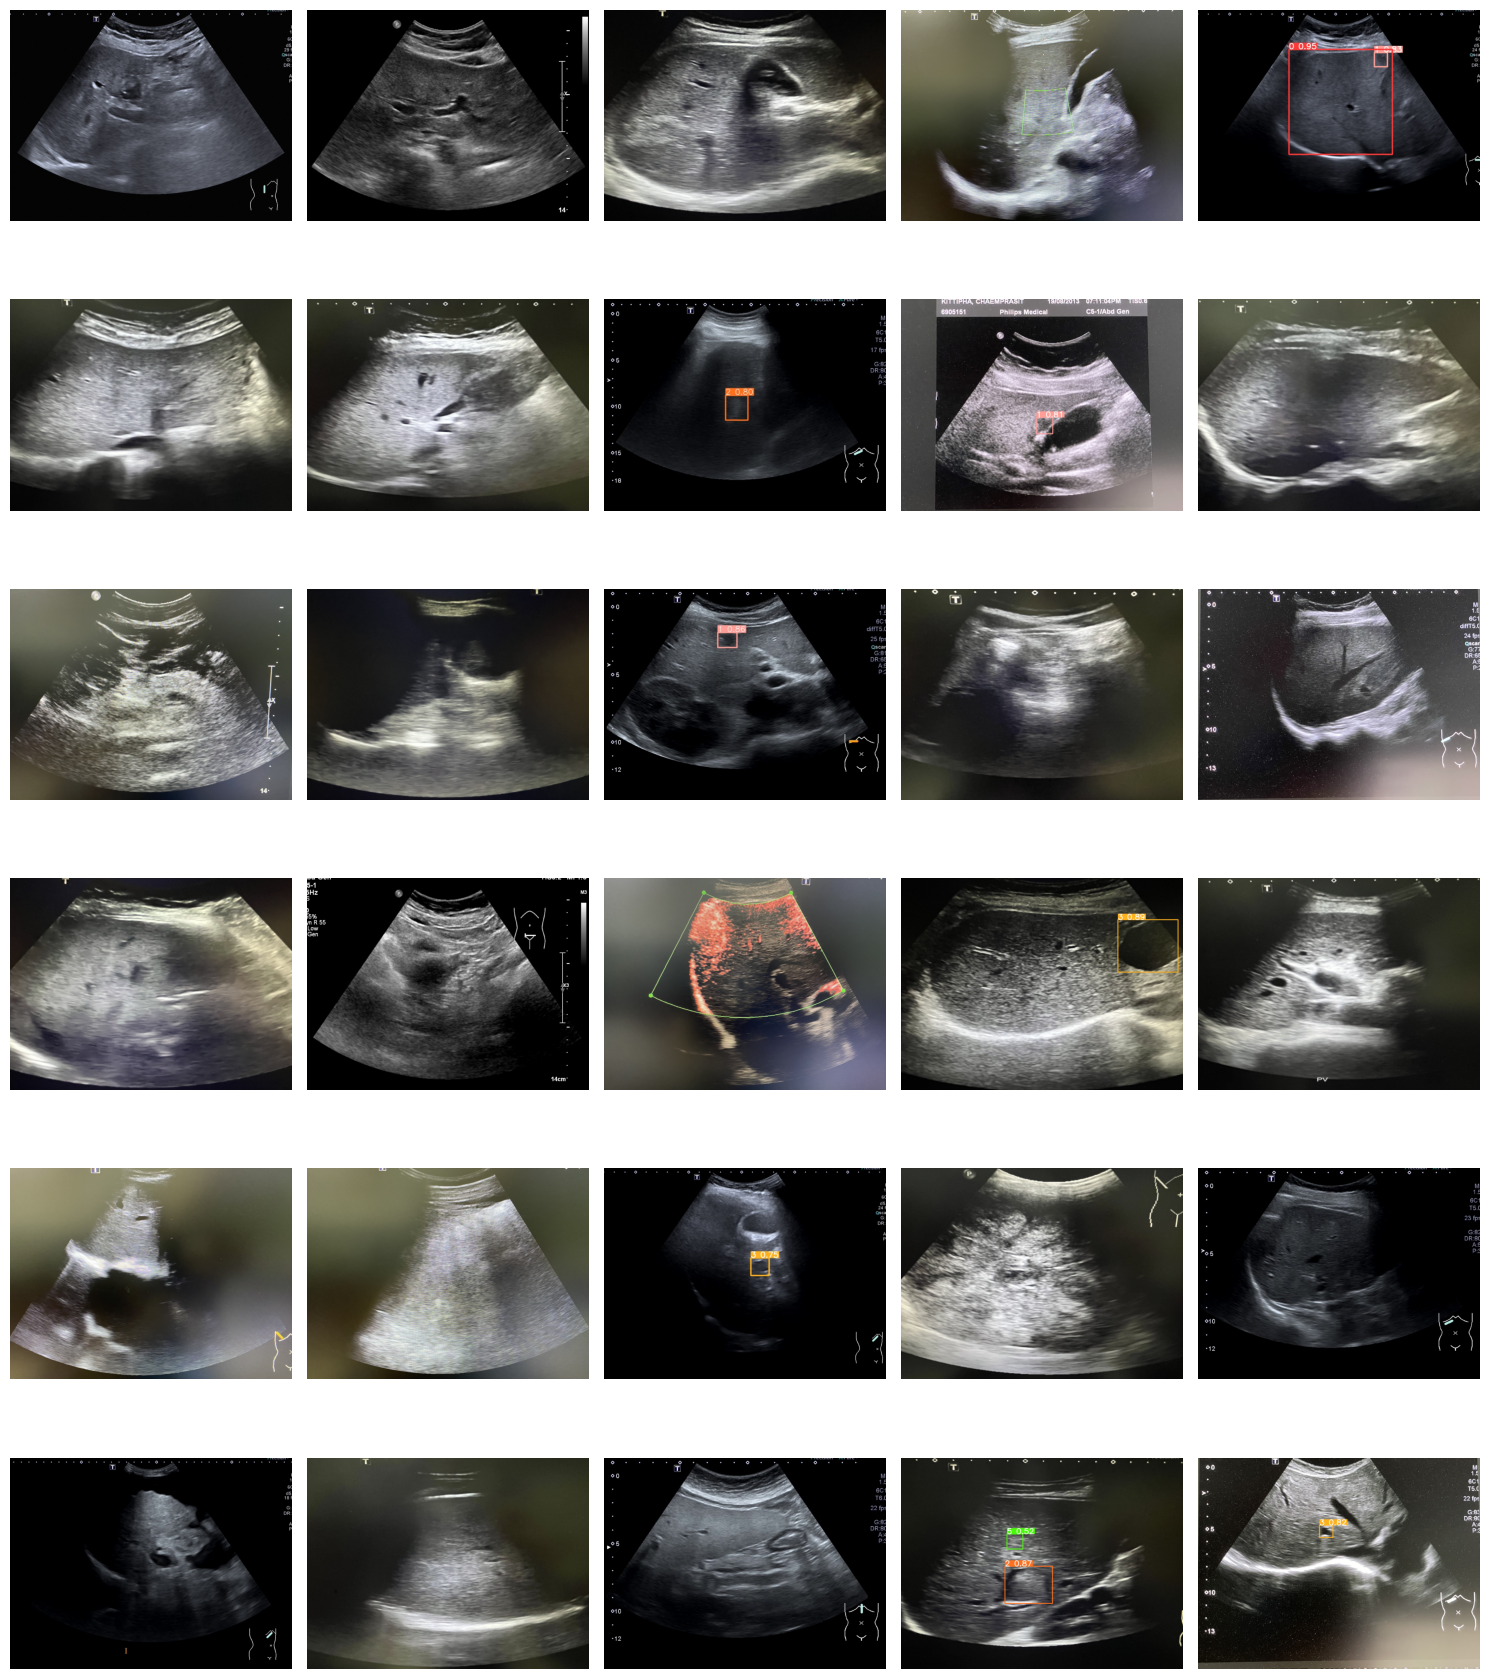

In [19]:
image_list = img[74:104]

# Define the number of columns for the grid
num_columns = 5
num_rows = len(image_list) // num_columns + (len(image_list) % num_columns > 0)

# Create a figure to contain the plot
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 3))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the images and plot them
for i, img_path in enumerate(image_list):
    if os.path.exists(img_path):
        img = mpimg.imread(img_path)
        axes[i].imshow(img)
        axes[i].axis('off')  # Hide the axis
    else:
        axes[i].set_visible(False)  # Hide the unused subplot

# Hide any remaining unused subplots
for i in range(len(image_list), len(axes)):
    axes[i].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()